<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# **Graphs**

## Median Value of Owner-Occupied Homes Boxplot

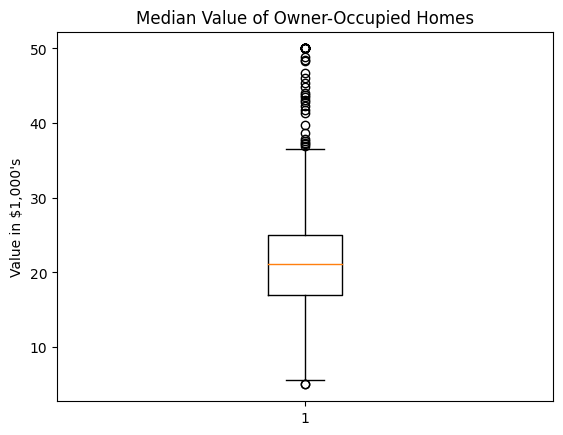

In [7]:
pyplot.boxplot(boston_df['MEDV'])
pyplot.title("Median Value of Owner-Occupied Homes")
pyplot.ylabel("Value in $1,000's")
pyplot.show()

#### Explanation:
* The Median Value of Owner-Occupied Homes is around 20,000 USD
* The middle 50% of non-outliers roughly value 16,000 to 25,000 USD
* There is an outlier roughly below 2,000 USD
* There are multiple outliers roughly above 37,0000 USD

## Charles River Bar Plot

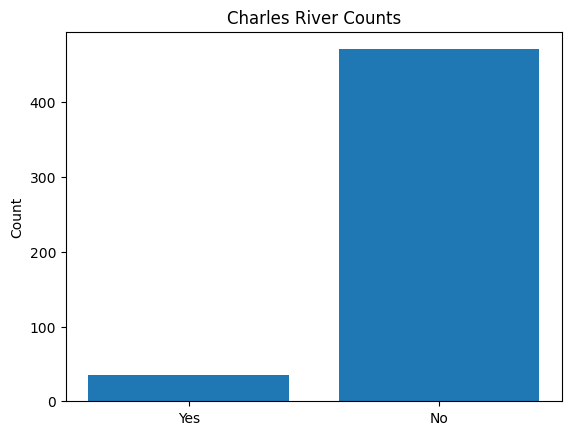

In [30]:
mapped = boston_df['CHAS'].map({0:"No", 1:"Yes"})
counts = mapped.value_counts().sort_index(ascending = False)
pyplot.bar(counts.index, counts.values)
pyplot.title("Charles River Counts")
pyplot.ylabel('Count')
pyplot.show()

#### Explanation:
- Only 35 of the 506 Homes tract bounds Charles River

## MEDV v. AGE Boxplot

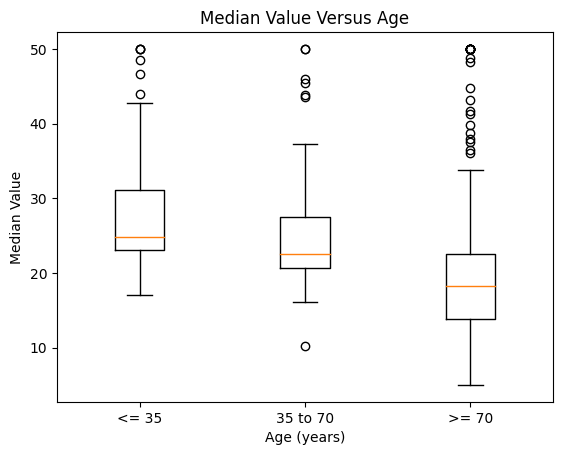

In [43]:
thirtyfive_below = boston_df[boston_df['AGE'] <= 35]['MEDV']
thirtyfive_seventy = boston_df[(boston_df['AGE'] >= 35) & (boston_df['AGE'] <= 70)]['MEDV']
seventy_above = boston_df[boston_df['AGE'] >= 70]['MEDV']
pyplot.boxplot([thirtyfive_below, thirtyfive_seventy, seventy_above], labels = ["<= 35", "35 to 70", ">= 70"])
pyplot.title("Median Value Versus Age")
pyplot.ylabel("Median Value")
pyplot.xlabel("Age (years)")
pyplot.show()

#### Explanation:
- The Median Values of Homes <= 35 years and 35 to 70 years have some overlap
- The Median value of the homes 70 years or older is lower than < 35 years

## NOX v. INDUS Scatter Plot

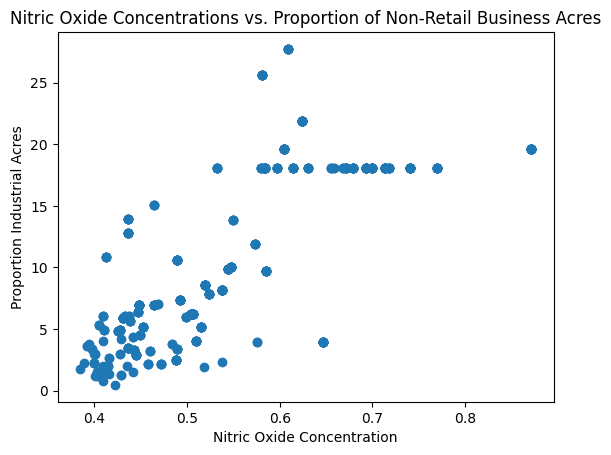

In [47]:
pyplot.scatter(boston_df['NOX'], boston_df['INDUS'])
pyplot.title("Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres")
pyplot.ylabel("Proportion Industrial Acres")
pyplot.xlabel("Nitric Oxide Concentration")
pyplot.show()

#### Explanation:
- Higher Nictric Oxide concentrations are related to a higher proportion of acres of non-retail business per town

## Pupil v. Teacher Ratio Histogram

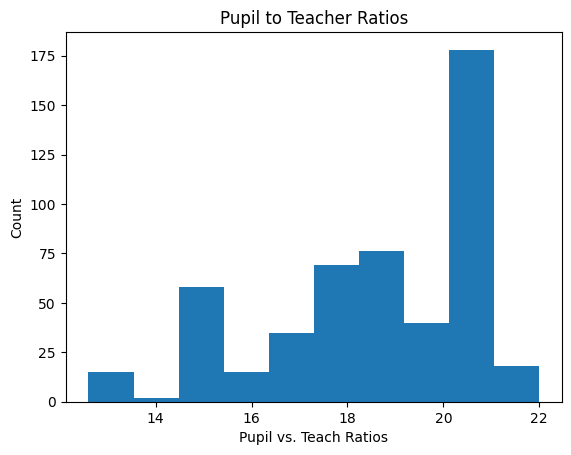

In [48]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.title("Pupil to Teacher Ratios")
pyplot.xlabel("Pupil vs. Teach Ratios")
pyplot.ylabel("Count")
pyplot.show()

#### Explanation:
- The Pupil to Teacher Ratio is skewed to the left with the vast majority between 20 and 21 pupils per teacher

# **Questions**

## Q1. Is there a significant difference in Median Value of houses bounded by the Charles River or not?

##### **H0:** 
##### There is no difference between median value homes by Charles River or Not.

In [50]:
MEDV_Charles = boston_df[boston_df['CHAS'] == 1]['MEDV']
MEDV_Not = boston_df[boston_df['CHAS'] == 0]['MEDV']
scipy.stats.ttest_ind(MEDV_Charles, MEDV_Not)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

##### **Conclusion:** 
##### Since the p-value 7.39e-05 is < α of 0.05, we reject the null hypothesis.
##### The Median Values are different by Charles River or Not.

## Q2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

##### **H0:**
##### There is no difference in Median Value by Proportion of units built before 1940.

In [52]:
scipy.stats.f_oneway(thirtyfive_below, thirtyfive_seventy, seventy_above)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

##### **Conclusion:**
##### Since the p-value of 1.7e-15 < α of 0.05, reject the null.
##### At least one age has a different Median Value than another age.

## Q3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

##### **H0:**
##### There is no relationship between Nitric Oxide Concentration and Proportion of non-retail business acres per town.

In [53]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

##### **Conclusion:**
##### Since the p-value of 7.91e-98 < α of 0.05, reject the null.
##### There is a linear relationship between Nictric Oxide Concentrations and the proportion of a town's acres dedicated to non-retail business.

## Q4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

##### **H0:**
##### There is no impact on the Median Value by adding an additonal weighted distance  to the five Boston employment centers.

In [54]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

# Fit the Regression Model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Show the results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        00:02:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### **Conclusion:**
##### Because the p-value of 1.21e-08 < α of 0.05, reject the null.
##### The impact of an additional weighted distance to the five Boston employment centers is the coefficient. The **impact** of an **additional distance** is **$1,091.60**

### Author:

##### Michael Magnotti